In [11]:
from src.seq2seq_verbs import Seq2SeqVerbs

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.levenhstein_dist import get_leven_dist

In [12]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep')

# Loading Model and Training

In [70]:
s2s = Seq2SeqVerbs(
    units=16,
    text_file='data/irr_verb_list.csv',
    headers={'train': 'infinitive', 'target': 'past simple'},
    name='vanilla16')

#s2s.train(epochs=4000, verbose=0)
#s2s.load_model('models/vanilla16')

In [71]:
gru_s2s = Seq2SeqVerbs(
    units=16, 
    rnn_type='gru', 
    text_file='data/irr_verb_list.csv',
    headers={'train': 'infinitive', 'target': 'past simple'}, 
    name='gru16')

#gru_s2s.train(epochs=4000, verbose=0)
#gru_s2s.load_model('models/gru16')

In [72]:
lstm_s2s = Seq2SeqVerbs(
    units=16, 
    rnn_type='lstm', 
    text_file='data/irr_verb_list.csv',
    headers={'train': 'infinitive', 'target': 'past simple'}, 
    name='lstm16')

#lstm_s2s.train(epochs=4000, verbose=0)
#lstm_s2s.load_model('models/lstm16')

## Inferring single word

In [81]:
text = 'pick'

In [82]:
print(s2s.infer(text))

pouke


In [83]:
print(gru_s2s.infer(text))

fought


In [84]:
print(lstm_s2s.infer(text))

bult


# Inferring Regular Verbs

In [2]:
orig_data = s2s.verb_processor.dataset_raw['infinitive'].to_list()
simple_past_data = s2s.verb_processor.dataset_raw['past simple'].to_list()
reg_data = pd.read_csv('data/reg_verb_list.csv')['infinitive'].to_list()

NameError: name 's2s' is not defined

In [ ]:
def infer_and_save(text_list, rnn_instance):
    res_lst = rnn_instance.infer_list(text_list)
    res = pd.DataFrame(res_lst).to_csv('predictions/' + rnn_instance.name + ('_prediction.csv'), index=False)
    
    return res_lst               

In [ ]:
rnn_pred = infer_and_save(reg_data, s2s)
gru_pred = infer_and_save(reg_data, gru_s2s)
lstm_pred = infer_and_save(reg_data, lstm_s2s)

join_reg = pd.DataFrame({'infinitive':reg_data, 'rnn':rnn_pred, 'gru':gru_pred, 'lstm':lstm_pred})
join_reg.to_csv('predictions/simple_past_prediction.csv', index=False)

In [3]:
join_reg = pd.read_csv('predictions/simple_past_prediction.csv').dropna()

In [4]:
df = pd.read_csv('data/irr_verb_list.csv')
x = df['infinitive'].to_list()
y = df['past simple'].to_list()

# Computing Levenhstein Distance

In [5]:
lv_orig = get_leven_dist(x,y)

In [6]:
lv_rnn = get_leven_dist(join_reg['infinitive'].to_list(), join_reg['rnn'].to_list())

In [7]:
lv_gru = get_leven_dist(join_reg['infinitive'].to_list(), join_reg['gru'].to_list())

In [8]:
lv_lstm = get_leven_dist(join_reg['infinitive'].to_list(), join_reg['lstm'].to_list())

# Histogram Plot of Levenhstein Distance

In [17]:
def hist_plot(lvs:list(), colors:list(), legends:list(), title='title'):
    for i in range(len(lvs)):        
        sns.histplot(lvs[i], kde=True, color=colors[i], alpha=0.3, discrete=True, stat='density', label=legends[i])
    plt.xlabel('Levenhstein Distance')
    plt.legend()
    plt.title(title)
    plt.savefig('figures/'+title+'.png')
    plt.show()

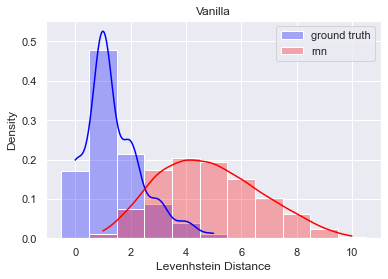

In [18]:
lvs = [lv_orig, lv_rnn]
colors = ['blue', 'red']
legends = ['ground truth', 'rnn']
hist_plot(lvs, colors, legends, 'Vanilla')

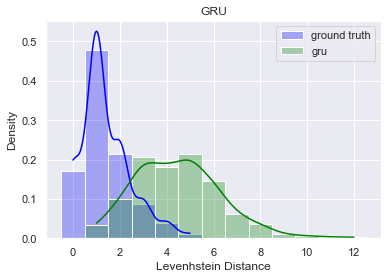

In [19]:
lvs = [lv_orig, lv_gru]
colors = ['blue', 'green']
legends = ['ground truth', 'gru']

hist_plot(lvs, colors, legends, 'GRU')

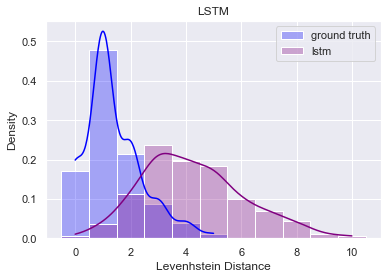

In [20]:
lvs = [lv_orig, lv_lstm]
colors = ['blue', 'purple']
legends = ['ground truth', 'lstm']

hist_plot(lvs, colors, legends, 'LSTM')

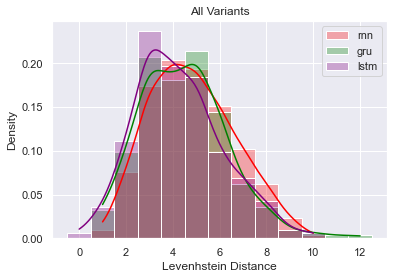

In [21]:
lvs = [lv_rnn, lv_gru, lv_lstm]
colors = ['red', 'green', 'purple']
legends = ['rnn', 'gru', 'lstm']

hist_plot(lvs, colors, legends, 'All Variants')